In [20]:
import icepyx as ipx
import numpy as np                   # Numeric Python
import matplotlib.pyplot as plt      # Plotting routines
import h5py                          # general HDF5 reading/writing library
import rioxarray as rx               # Package to read raster data from hdf5 files
from pyproj import Transformer, CRS  # libraries to allow coordinate transforms
import glob                          # Package to locate files on disk
import os                            # File-level utilities
import re                            # regular expressions for string interpretation
import xarray as xr
from tqdm import tqdm
from scipy.stats import norm
import pickle

In [2]:
import pystac_client
import geopandas as gpd
import ast
import pandas as pd
import geoviews as gv
import hvplot.pandas
from ipywidgets import interact
from IPython.display import display, Image
import intake # if you've installed intake-STAC, it will automatically import alongside intake
import boto3
import rasterio as rio
import rioxarray as rxr
from rasterio.session import AWSSession
from rasterio.plot import show
from dask.utils import SerializableLock
import hvplot.xarray
from pyproj import Proj, transform

In [3]:
short_name = 'ATL03'
# PineIsland
spatial_extent = [-101.8,-75.23,-100.50,-74.80]
# date_range = ['2019-01-01','2019-01-30']
date_range = ['2019-04-16','2019-04-16']
# path = '../data/ATL03/'
path = '~/Polynyas/data/SR_rgts_by_cycle_BBox/'

In [7]:
def ATL03_to_xarray(path):
    dataset_list = []
    for track in ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']:
        ds = xr.open_dataset(
            filename_or_obj=path,
            group=f"{track}/heights",
        )
        ds['gt_id'] = [track]
        ds['delta_time'] = np.arange(len(ds.delta_time.data))
        ds = ds.rename({'delta_time': 'id_point'})
        dataset_list.append(ds)
    dataset = xr.concat(dataset_list, dim = 'gt_id')
    return dataset

def get_file_in_directory(path): 
    "Retrieves file names from a directory \
    \n\nInput: path = directory \
    \n\nOutput: list of subdirectories"

    return [name for name in os.listdir(path)
            if os.path.isfile(os.path.join(path, name))]

In [30]:
get_file_in_directory('/home/jovyan/Polynyas/data/SR_rgts_by_cycle_BBox/')

['rgt0142_reg12_cyc03.nc',
 'rgt0713_reg10_cyc09.nc',
 'rgt0584_reg12_cyc06.nc',
 'rgt0271_reg10_cyc03.nc',
 'rgt0584_reg12_cyc02.nc']

In [161]:
path03 = 'Polynyas/data/ATL03_ATL06_slideruledata/'
ATL03file = [
    'processed_ATL03_20190115051807_02710210_005_01.h5',
    'processed_ATL03_20190416005803_02710310_005_01.h5',
    'processed_ATL03_20190204172429_05840212_005_01.h5',
    'processed_ATL03_20190407142807_01420312_005_01.h5',
    'processed_ATL03_20200203000326_05840612_005_01.h5',
    'processed_ATL03_20201109213246_07130910_005_01.h5']

ncfile = [
    'PI_20190115.nc',
    'PI_20190416.nc']
    
processedSSH = [
    'procSSH_20190115.nc',
    'procSSH_20190416.nc',
    'procSSH_20190407.nc',
    'procSSH_20190204.nc',
    'procSSH_20200203.nc',
    'procSSH_20201109.nc']

processedOCN = [
    'procOCN_20190115.nc',
    'procOCN_20190416.nc',
    'procOCN_20190407.nc',
    'procOCN_20190204.nc',
    'procOCN_20200203.nc',
    'procOCN_20201109.nc']

pathSR = 'Polynyas/data/SR_rgts_by_cycle_BBox/'
sliderule = [
    None,
    'rgt0271_reg10_cyc03.nc', 
    'rgt0142_reg12_cyc03.nc',
    'rgt0584_reg12_cyc06.nc',
    'rgt0584_reg12_cyc02.nc',
    'rgt0713_reg10_cyc09.nc'] # should work but isn't

dateRngs = [
    '2019-01-14T00:00:00Z/2019-01-15T23:59:59Z',
    '2019-04-16T00:00:00Z/2019-04-16T23:59:59Z',
    '2019-04-07T00:00:00Z/2019-04-07T23:59:59Z',
    '2019-02-04T00:00:00Z/2019-02-04T23:59:59Z',
    '2019-02-03T00:00:00Z/2019-02-03T23:59:59Z',
    '2020-11-09T00:00:00Z/2020-11-09T23:59:59Z'] # should work but isn't

In [168]:
z = 2
ds = ATL03_to_xarray(path03 + ATL03file[z])
ds

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'pydap', 'rasterio', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [169]:
# read nc
z = 2
os.chdir('/home/jovyan/'+pathSR)
ds = xr.open_dataset(sliderule[z])
# spot_var = xr.Variable('gt_id',ds.variables['spot'])
# ds = ds.expand_dims(dim=dict(gt_id=spot_var))
# ds.assign_coords({"gt_id": ds.variables['spot']})

In [142]:
# read nc
os.chdir('/home/jovyan/'+path03)
ds = xr.open_dataset(ncfile[z])
ds

<xarray.Dataset>
Dimensions:         (id_point: 378909, gt_id: 6, ds_surf_type: 5)
Coordinates:
  * id_point        (id_point) int64 0 1 2 3 4 ... 378905 378906 378907 378908
  * gt_id           (gt_id) object 'gt1l' 'gt1r' 'gt2l' 'gt2r' 'gt3l' 'gt3r'
Dimensions without coordinates: ds_surf_type
Data variables:
    dist_ph_across  (gt_id, id_point) float32 ...
    dist_ph_along   (gt_id, id_point) float32 ...
    h_ph            (gt_id, id_point) float32 ...
    lat_ph          (gt_id, id_point) float64 ...
    lon_ph          (gt_id, id_point) float64 ...
    pce_mframe_cnt  (gt_id, id_point) uint32 ...
    ph_id_channel   (gt_id, id_point) uint8 ...
    ph_id_count     (gt_id, id_point) int8 ...
    ph_id_pulse     (gt_id, id_point) uint8 ...
    quality_ph      (gt_id, id_point) int8 ...
    signal_conf_ph  (gt_id, id_point, ds_surf_type) int8 ...
Attributes:
    Description:  Contains arrays of the parameters for each received photon.
    data_rate:    Data are stored at the photon detection rate.

In [99]:
np.unique(ds.spot)

array([1., 2., 3., 4., 5., 6.])

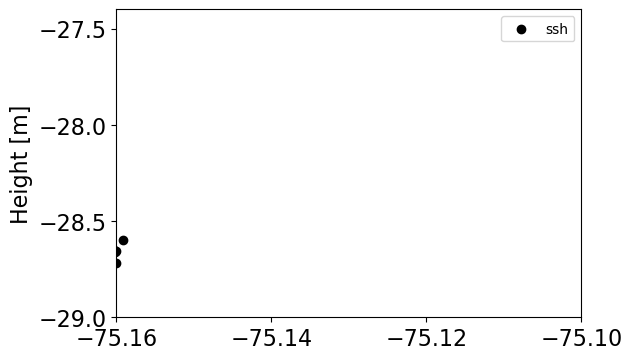

In [170]:
data = ds.where((ds.spot==6.0), drop=True)
fig, ax = plt.subplots(ncols=1,sharey=True,sharex=True,figsize=(6,4))
ax.tick_params(labelsize=16)
ax.scatter(data['latitude'],data['h_mean'],color='k',label='ssh')
# ax.plot(data['latitude'],data['h_mean'],color='k',label='ssh')
ax.set_ylabel('Height [m]',fontsize=16)
plt.xlim(-75.16,-75.1);
plt.ylim(-29.0,-27.4);
ax.legend()

# plt.grid(linestyle=':')   

# ax1 = ax.twinx()
# ax1.tick_params(labelsize=12)
# ax1.plot(lat_transect,t_transect,color='r',label='thermal')
# ax1.set_ylabel('thermal',fontsize=12)
# #plt.ylim(17100,17450);
# plt.ylim(14000,16000);
# ax1.legend()

# ax1 = ax.twinx()
# ax1.tick_params(labelsize=12)
# ax1.plot(lat_transect,t_transect,color='r',label='thermal')
# ax1.set_ylabel('thermal',fontsize=12)
# #plt.ylim(17100,17450);
# plt.ylim(14000,16000);
# ax1.legend()

plt.show()

### Retrieve ocean surface height from ICESat-2 ATL03

#### Select "ocean" photons

In [18]:
def ocn_sec(ds):
    '''
    This function returns dataset containing ATL03 classified as ocean area (accuracy not well?)
    with confidence level in ocean column larger than 2 (medium and high)
    with quality <2 nominal + possible after pulse)
    '''
    ocn_ds = ds.where( (ds['signal_conf_ph'][:,2]>2) & (ds['quality_ph']<2) , drop=True)
    return ocn_ds

#### Height estimates & photon density

In [19]:
from math import sin, cos, sqrt, atan2, radians
def distance(lon1,lat1,lon2,lat2):
    '''
    This function calculates distance between two coordinates
    return distance in meter
    '''
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    dist = R * c * 1000
    return dist

def ssh_estimate(ocn_ds,num_photon,binsize):
    '''
    This function returns ssh estimates on a running section 
    section length is associated with the number of photons chosen
    returns height estimates based on the histogram, mean latitude/longitude in the chosen photons, and 
    photon density
    '''
    h_value = [];
    h_err = [];
    lon_ave = [];
    lat_ave = [];
    ph_density = [];
    
    for i in range(0,len(ocn_ds['lat_ph']),num_photon):
    #for i in range(0,len(ocn_ds['lat_ph']),10):
        h = ocn_ds['h_ph'][i:i+num_photon]
        # histogram and the representative values
        h_hist = np.histogram(h,bins=np.arange(-100,100,binsize))
        h_value = np.append(h_value, np.mean(h_hist[1][np.where(h_hist[0]==h_hist[0].max())]))
        # std error for uncertainties
        h_err = np.append(h_err, np.std(h)/np.sqrt(num_photon))
        # mean lat/lon
        lats = ocn_ds['lat_ph'][i:i+num_photon]
        lons = ocn_ds['lon_ph'][i:i+num_photon]
        lon_ave = np.append(lon_ave, np.mean(lons))
        lat_ave = np.append(lat_ave, np.mean(lats))
        
        # photon density
        latmax,latmin = lats.max(),lats.min()
        lonmax,lonmin = lons.max(),lons.min() 
        trans_distance = distance(lonmax,latmax,lonmin,latmin)
        ph_density.append(num_photon/trans_distance*100)
        ocean_class = [i<45 for i in ph_density]
        
    # write results into xarray dataset
    ds = xr.Dataset(
        data_vars=dict(
            h_estimate=(["x"], h_value),
            h_err=(["x"], h_err),
            ph_dens=(['x'], ph_density),
            ocean_class=(['x'], ocean_class),
            ),
        coords=dict(
            lon=(["x"], lon_ave),
            lat=(["x"], lat_ave),
            ),
        
        attrs=dict(description="height estimated from histogram"),
        )
    return ds

#### PineIsland, 2019/01/15

In [144]:
ssh_dset_dict = {}
ocn_dset_dict = {}
for track in ['gt1l','gt2l','gt3l','gt1r','gt2r','gt3r']:
    ocn_ds = ocn_sec(ds.sel(gt_id=track))
    ssh = ssh_estimate(ocn_ds,50,0.02)
    ssh_dset_dict[track] = ssh
    ocn_dset_dict[track] = ocn_ds

In [145]:
# save to pickle
with open(processedSSH[z], 'wb') as handle:
    pickle.dump(ssh_dset_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(processedOCN[z], 'wb') as handle:
    pickle.dump(ocn_dset_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
os.chdir('/home/jovyan/'+path03)
with open(processedSSH[z], 'rb') as handle:
    ssh_dset_dict = pickle.load(handle)
with open(processedOCN[z], 'rb') as handle:
    ocn_dset_dict = pickle.load(handle)

In [26]:
# ocn_dset_dict

#### Figure: histogram over an ocean area

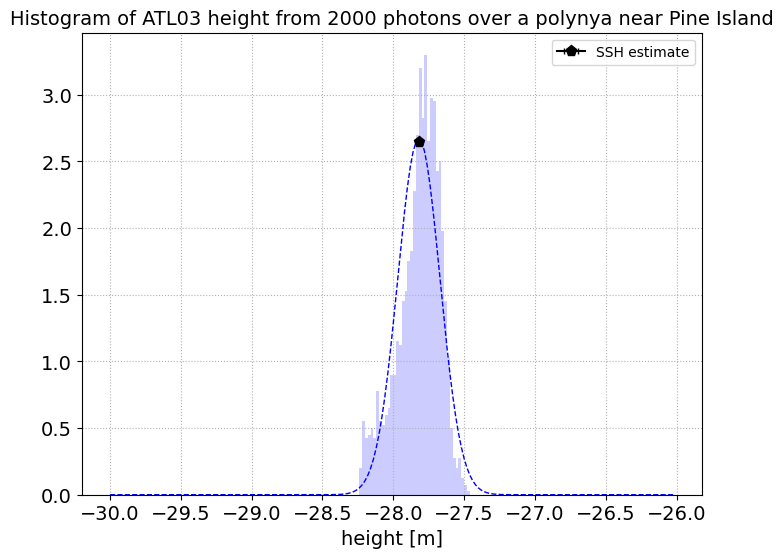

In [29]:
# histogram over an ocean area looks like:
i = 2000; num_photon=2000; track = 'gt2l';
h = ocn_dset_dict[track]['h_ph'][i:i+num_photon]
# Fit a normal distribution to the data:
# mean and standard deviation
mu, std = norm.fit(h) 
# Plot the PDF.
x = np.arange(-30, -26, 0.02)
p = norm.pdf(x, mu, std)

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
ax.tick_params(labelsize=14)
ax.plot(x, p, 'b--', linewidth=1)
ax.errorbar(mu, p[np.where(x>=mu)[0].min()], xerr=ssh['h_err'][int(np.floor(i/70))], marker='p', markersize=8, capsize=2,color='k',label='SSH estimate')
# histogram and the representative values
h_hist = plt.hist(h,bins=np.arange(-30,-26,0.02),density=True, alpha=0.2, color='b',rwidth=3)
# plt.xlim(-28.6,-27.25)
plt.grid(linestyle=':')
plt.xlabel('height [m]',fontsize=14)
plt.title(f'Histogram of ATL03 height from {num_photon} photons over a polynya near Pine Island',fontsize=14)
plt.legend()

#### Height along one beam and photon class

In [28]:
ssh = ssh_dset_dict['gt2l']
ssh

<xarray.Dataset>
Dimensions:      (x: 6008)
Coordinates:
    lon          (x) float64 -101.4 -101.4 -101.4 ... -101.6 -101.6 -101.6
    lat          (x) float64 -74.8 -74.8 -74.8 -74.8 ... -75.23 -75.23 -75.23
Dimensions without coordinates: x
Data variables:
    h_estimate   (x) float64 -27.8 -27.66 -27.75 -27.8 ... 45.1 45.06 45.05
    h_err        (x) float64 0.02265 0.01953 0.01918 ... 0.1168 0.01909 0.01828
    ph_dens      (x) float64 546.5 593.3 590.0 ... 1.19e+03 1.02e+03 3.736e+06
    ocean_class  (x) bool False False False False ... False False False False
Attributes:
    description:  height estimated from histogram

Plot photon density and ocean/ice class

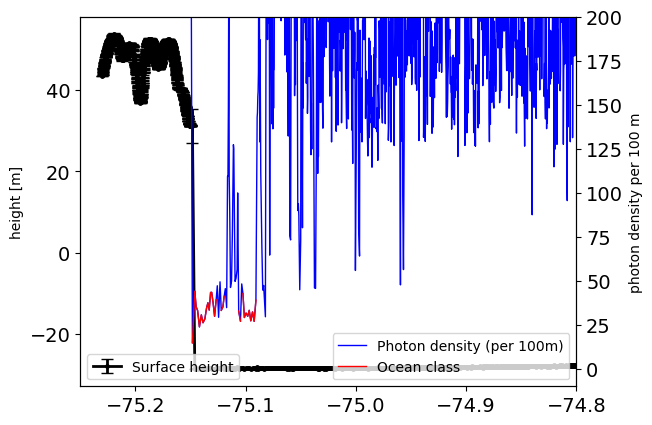

In [13]:
ocean = ssh['ph_dens'].where(ssh['ocean_class']==1,np.nan)

fig, ax1 = plt.subplots()

ax1.tick_params(labelsize=14)
ax1.errorbar(ssh['lat'], ssh['h_estimate'], yerr=ssh['h_err'], marker='.', color='k',markersize=5, capsize=4,linewidth=2,label='Surface height')
ax1.set_xlim(-75.25,-74.8)
ax1.set_ylabel('height [m]')

ax2 = ax1.twinx() 
ax2.tick_params(labelsize=14)
ax2.plot(ssh['lat'], ssh['ph_dens'],color='b',linewidth=1,label='Photon density (per 100m)')
ax2.plot(ssh['lat'], ocean,color='r',linewidth=1,label='Ocean class')
ax2.set_ylim(-10,200)
ax2.set_ylabel('photon density per 100 m')

ax1.legend(loc='lower left')
ax2.legend()

plt.show()

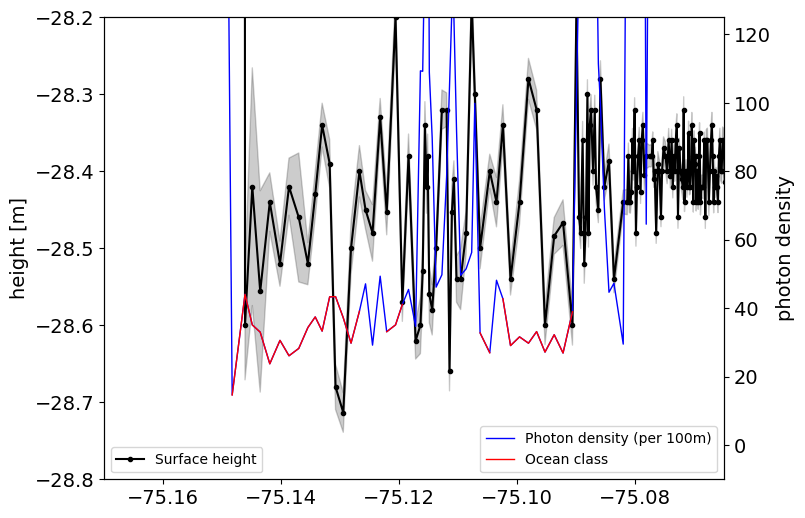

In [14]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.tick_params(labelsize=14)
#ax1.errorbar(ssh['lat'], ssh['h_estimate'], yerr=ssh['h_err'], marker='.', color='k',markersize=5, capsize=4,linewidth=2,label='Surface height')
ax1.fill_between(ssh['lat'], ssh['h_estimate']-ssh['h_err'], ssh['h_estimate']+ssh['h_err'],color='k',alpha=0.2)
ax1.plot(ssh['lat'], ssh['h_estimate'],'o-',markersize=3,color='k', label='Surface height')
ax1.set_xlim(-75.17,-75.065)
ax1.set_ylim(-28.8,-28.2)
ax1.set_ylabel('height [m]',fontsize=14)

ax2 = ax1.twinx() 
ax2.tick_params(labelsize=14)
ax2.plot(ssh['lat'], ssh['ph_dens'],color='b',linewidth=1,label='Photon density (per 100m)')
ax2.plot(ssh['lat'], ocean,color='r',linewidth=1,label='Ocean class')
ax2.set_ylim(-10,125)
ax2.set_ylabel('photon density', fontsize=14)

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

plt.show()
fig.savefig("ssh_ph_dens.png", dpi=300)

# SlideRule data

In [15]:
short_name = 'ATL03'
# PineIsland
spatial_extent = [-101.8,-75.23,-100.50,-74.80]
# date_range = ['2019-01-01','2019-01-30']
date_range = ['2019-04-16','2019-04-16']

In [171]:
# read nc
os.chdir('/home/jovyan/'+pathSR)
ds = xr.open_dataset(sliderule[z])
# spot_var = xr.Variable('gt_id',ds.variables['spot'])
# ds = ds.expand_dims(dim=dict(gt_id=spot_var))
# ds.assign_coords({"gt_id": ds.variables['spot']})

In [23]:
ds

<xarray.Dataset>
Dimensions:                 (delta_time: 2671)
Coordinates:
  * delta_time              (delta_time) datetime64[ns] 2019-04-07T14:29:09.0...
    latitude                (delta_time) float64 ...
    longitude               (delta_time) float64 ...
Data variables: (12/14)
    pflags                  (delta_time) float64 ...
    h_mean                  (delta_time) float64 ...
    segment_id              (delta_time) float64 ...
    h_sigma                 (delta_time) float64 ...
    n_fit_photons           (delta_time) float64 ...
    cycle                   (delta_time) float64 ...
    ...                      ...
    dh_fit_dx               (delta_time) float64 ...
    w_surface_window_final  (delta_time) float64 ...
    distance                (delta_time) float64 ...
    spot                    (delta_time) float64 ...
    gt                      (delta_time) float64 ...
    dh_fit_dy               (delta_time) float64 ...
Attributes: (12/21)
    featureType:           trajectory
    title:                 ATLAS/ICESat-2 SlideRule Height
    reference:             https://doi.org/10.5281/zenodo.5484048
    date_created:          2022-10-18T11:01:34.748697
    date_type:             UTC
    time_type:             CCSDS UTC-A
    ...                    ...
    res:                   10.0
    yapc:                  {"score": 192, "knn": 0, "min_ph": 4, "win_h": 3, ...
    version:               1.4.6
    commit:                v1.4.6-0-g300fc61
    poly0_x:               [-100.3773, -101.081, -102.2457, -101.1967, -100.3...
    poly0_y:               [-74.844, -74.7785, -75.1702, -75.1829, -74.844]

### Acquire Landsat COGs and read into xarray
#### Install required packages

Set required credentials to retrieve imagery from a requester pays AWS S3 bucket

In [172]:
# Sets up credentials for acquiring images through dask/xarray
os.environ["AWS_REQUEST_PAYER"] = "requester"

# Sets up proper credentials for acquiring data through rasterio
aws_session = AWSSession(boto3.Session(), requester_pays=True)

Search for imagery in STAC catalog using satsearch

In [173]:
# Search for Landsat or Sentinel images based on a bounding box, date and other metadata if desired
# Save to geojson file
# NOTE this STAC API endpoint does not currently search the entire catalog

satellite = 'Landsat8'

bbox = (-105.0, -74.970, -105.08, -74.950) #(west, south, east, north) 
dateRng = dateRngs[z]

if satellite=='Landsat8':
    url = 'https://landsatlook.usgs.gov/stac-server'
    collection = 'landsat-c2l1'
    band = 'blue'
    colnm = ['landsat:wrs_path','landsat:wrs_row']
    end = '_T2' # end of file name if don't want all
    qa_band = 'qa_pixel'
elif satellite=='Sentinel2':
    url = 'https://earth-search.aws.element84.com/v0' # maybe also https://services.sentinel-hub.com/api/v1/catalog/
    collection = 'sentinel-s2-l2a-cogs'
    band = 'B02'
    colnm = ['sentinel:latitude_band','sentinel:grid_square']
    end = 'L2A'
    qa_band = 'SCL'
elif satellite=='Sentinel1': ### Doesn't work
    url = 'http://eocloud.sentinel-hub.com/search'
    collection = 'sentinel-s1-rtc-indigo'

api = pystac_client.Client.open(url)

items = api.search(
            bbox = bbox,
            datetime = dateRng,
            limit = 400,
            collections=collection
        ).get_all_items()
    
print(f'{len(items)} items')
gjson_outfile = f'/home/jovyan/Polynyas/contributors/Tasha/{satellite}.geojson'
items.save_object(gjson_outfile)

1 items


In [174]:
# Load the geojson file
gf = gpd.read_file(gjson_outfile)
gf.head()

,id,datetime,view:sun_azimuth,view:sun_elevation,platform,view:off_nadir,landsat:cloud_cover_land,landsat:wrs_type,landsat:wrs_path,landsat:wrs_row,landsat:scene_id,landsat:collection_category,landsat:collection_number,landsat:correction,proj:epsg,created,updated,geometry
0,LC08_L1GT_159131_20190407_20200829_02_T2,2019-04-07 07:15:02.246000+00:00,175.815552,-22.008382,LANDSAT_8,0,-1,2,159,131,LC81591312019097LGN00,T2,02,L1GT,3031,2022-07-06 20:31:16.736000+00:00,2022-07-06 20:31:16.736000+00:00,"POLYGON ((-99.67415 -74.90890, -103.42638 -73...."


In [175]:
# Plot search area of interest and frames on a map using Holoviz Libraries (more on these later)
cols = gf.loc[:,('id','landsat:wrs_path','landsat:wrs_row','geometry')]
footprints = cols.hvplot(geo=True, line_color='k', hover_cols=['landsat:wrs_path','landsat:wrs_row'], alpha=0.2, title='Landsat 8 T1',tiles='ESRI')
tiles = gv.tile_sources.CartoEco.options(width=700, height=500) 
labels = gv.tile_sources.StamenLabels.options(level='annotation')
tiles * footprints * labels

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (landsat:wrs_path,landsat:wrs_row)
   .WMTS.II    :WMTS   [Longitude,Latitude]

#### Intake all scenes using the intake-STAC library

In [176]:
catalog = intake.open_stac_item_collection(items)
sceneids = list(catalog)
list(catalog)

['LC08_L1GT_159131_20190407_20200829_02_T2']

#### Open and visualize each image using RasterIO 

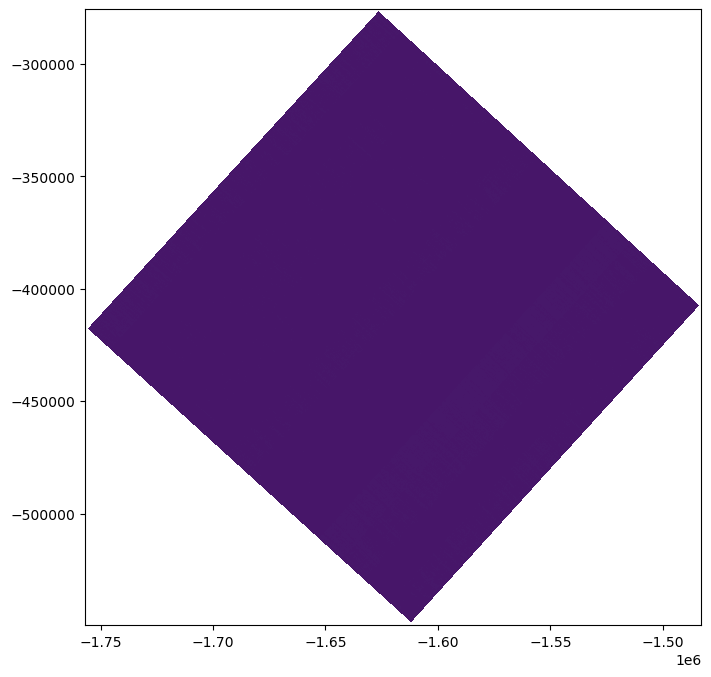

In [177]:
#item0 = catalog[sceneids[3]]
#2,1,0
item0 = catalog[sceneids[0]]

# Retrieve first scene using rio
item_url = item0.blue.metadata['alternate']['s3']['href']

# Read and plot with grid coordinates 
with rio.Env(aws_session):
    with rio.open(item_url) as src:
        fig, ax = plt.subplots(figsize=(9,8))
        
        # To plot
        show(src,1)
        
        # To open data into a numpy array
        profile = src.profile
        arr = src.read(1)

#### Read into Xarray

In [36]:
def retrieve_bands(item,satellite):
    '''Get band names for specific satellite
    input:
        item = stac catalog item
        satellite = str satellite name
    return:
        band_names = list of str of desired band names
    '''
    
    band_names = []
    if satellite=='Landsat8':
        for k in item.keys():
            M = getattr(item, k).metadata
            if 'eo:bands' in M:
                resol = M['eo:bands'][0]['gsd']
#                 print(k, resol)
                if resol >= 30: # thermal bands are up sampled from 100 to 30
                    band_names.append(k)
        
    elif satellite=='Sentinel2': # no thermal data so therm will be empty
        for k in item.keys():
            try:
                M = getattr(item, k).metadata
                if 'data' in M['roles']:
                    if 'eo:bands' in M:
                        resol = M['gsd']
                        # print(k, resol)
                        if resol == 10:
                            band_names.append(k)
            except:
                continue
                
    return band_names

def add_mask(qa_band,satellite):
    ''' Add the qa band for the satellite as a mask
    
    input:
        qa_band = str name of satellite qa band
        satellite = str name of satellite
    
    return: 
        mask_c = mask array or qa band
    '''
    
    if satellite == 'Landsat8':
        # Create and add cloud mask (this mask is technically everything except nan,ocean,ice clear sky)
        # 1 is no data, 21952 is ocean, 30048 is ice (can change this to add more)
        # Access mask via 'ts_scenes.isel(time=0).mask'
        
        # Determined qa_pixel values
        ice = [30048, 30304]
        ocean = [21952, 22208]
        cloud = [21762,22018,22280,23826,24082,29986,30242,54790,55052,56598,56660,56854,56916,62758,62820,63014,63076]
        nans = [1]
        
        qa = scene.sel(band=qa_band)
        cond = np.logical_or((qa.isin(ocean))|(qa.isin(ice)), qa==1)
#         cond = np.logical_or((qa==21952)|(qa==30048), qa==1)
        qa_c = qa.where(~cond, np.nan)
        cond = np.logical_or((qa_c.isin(ocean))|(qa_c.isin(ice)), qa_c==1)
        mask_c = qa_c.where(qa_c.isnull(),2) # cloud = 2
        
        # For optional ice mask
        qa_io = qa.where(qa.isin(ice), np.nan)
        mask_io = qa_io.where(~(qa_io.isin(ice)),1) # ice = 1
        mask_c = mask_io.where(mask_io==1,mask_c)
    
    elif satellite == 'Sentinel2':
        mask_c = scene.sel(band=qa_band)
    
    return mask_c

In [178]:
# Import to xarray with cloud mask  ***Creating cloud mask is slow
# nans are in locations where concat of multiple scenes has expanded the grid
# Would like to use SR for all bands except TIR, but they are not available for many scenes so would
# need a separate model for scenes with SR and those without.
scenes = []

# Create time variable for time dim
time_var = xr.Variable('time',gf.loc[gf.id.isin([item for item in sceneids if item.endswith(end)])]['datetime'])
_, index = np.unique(time_var, return_index=True) # for some reason there are duplicates in Sentinel
time_var = time_var[index]
    
for item in sceneids:
    if item.endswith(end):
        item = catalog[item]
        print (item.name)
        
        bands = []
        
        # Get desired band names, currently hard coded for resolutions
        # band_names = retrieve_bands(item,satellite)
        band_names = ['blue','green','red','lwir11']
                    
        # Add qa band
        band_names.append(qa_band)

        # Concatenate desired bands and construct xarray for scene
        for band_name in band_names:
            if satellite=='Landsat8':
                url = item[band_name].metadata['alternate']['s3']['href']
            elif satellite=='Sentinel2':
                url = item[band_name].metadata['href']
            band = item[band_name](chunks=dict(band=1, x=2048, y=2048),urlpath=url).to_dask() # Specify chunk size, landsat is prob in 512 chunks so used multiple
            band['band'] = [band_name]
            bands.append(band)
        scene = xr.concat(bands, dim='band')
        
        # Add qa band or mask and concatenate, in L8 cloud=2/ice=1
        mask = add_mask(qa_band,satellite)
        scene.coords['mask'] = (('y', 'x'), mask.data)
        scenes.append(scene)

# Concatenate scenes with time variable ***This is the slowest
ts_scenes = xr.concat(scenes, dim=time_var)

# Get epsg for Landsat images
# epsg = item.metadata['proj:epsg']
# epsg = ts_scenes.crs
pix = ts_scenes.transform[0]

ts_scenes

LC08_L1GT_159131_20190407_20200829_02_T2


<xarray.DataArray (time: 1, band: 5, y: 9131, x: 9141)>
dask.array<broadcast_to, shape=(1, 5, 9131, 9141), dtype=uint16, chunksize=(1, 1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U8 'blue' 'green' 'red' 'lwir11' 'qa_pixel'
  * y        (y) float64 -2.757e+05 -2.757e+05 ... -5.496e+05 -5.496e+05
  * x        (x) float64 -1.757e+06 -1.757e+06 ... -1.483e+06 -1.483e+06
    mask     (y, x) float64 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
  * time     (time) datetime64[ns] 2019-04-07T07:15:02.246000
Attributes:
    transform:      (30.0, 0.0, -1757115.0, 0.0, -30.0, -275685.0)
    crs:            +init=epsg:3031
    res:            (30.0, 30.0)
    is_tiled:       1
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Point

#### Subset one image 

In [179]:
sbands = ['blue','green','red','lwir11']

# Select the first datetime
t = ts_scenes.time.values[0]
# t = ts_scenes.time.values[0]
print (t)

# Upper left and lower right coordinates for subsetting to Pine Island area
ulx = -1635000
uly = -290000
lrx = -1580000
lry = -350000

timage = ts_scenes.sel(time=t,band='lwir11',y=slice(lry,uly),x=slice(ulx,lrx))
bimage = ts_scenes.sel(time=t,band='blue',y=slice(lry,uly),x=slice(ulx,lrx))
# image = image.rio.reproject(4326) ##doesn't work

pol_y = timage.y
pol_x = timage.x
pol_x, pol_y = np.meshgrid(pol_x, pol_y)

inProj = Proj(init='epsg:3031')
outProj = Proj(init='epsg:4326')
pol_lon,pol_lat = transform(inProj,outProj,pol_x,pol_y) # This order from the landsat coordinates to lat lon

timagen = np.array(timage.where(timage.notnull(),0))
# image = np.moveaxis(image, 0, -1)

2019-04-07T07:15:02.246000000


/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_464/2403306976.py:24: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  pol_lon,pol_lat = 

In [43]:
# # Visualize with rasterIO
# rgb = timage.sel(band=['red','green','blue']).to_numpy()
# rgb = np.moveaxis(rgb, 0, -1)

# # Read and plot with grid coordinates 
# with rio.Env(aws_session):
#     with rio.open(item_url) as src:
#         fig, ax = plt.subplots(figsize=(9,8))
        
#         # To plot
#         show(src,1)

### Extract surface classifications and thermal data from Landsat along an ICESat-2 track

#### Extract transects along IS2 tracks

In [39]:
def getclosest_ij(lons,lats,lonpt,latpt):
    '''
    Determine pixel index of the closest grid cell to a desired point.
    
    Input:
    lons/lats: 2D array of lons/lats
    lonpt/latpt: lon/lat of point to find an index for closest grid cell
    Return:
    x/y: index of lon/lat
    '''
    
    abslat=np.abs(lats-latpt)
    abslon=np.abs(lons-lonpt)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    return x,y

def extract_line(data,lons,lats,lonpt,latpt):
    '''
    Extract a line of pixels between the max and min of another set of lat/lon data
    '''
    
    max_idx = getclosest_ij(lons,lats,lonpt.max().values,latpt.max().values)
    min_idx = getclosest_ij(lons,lats,lonpt.min().values,latpt.min().values)
    x0, y0 = min_idx # These are in _pixel_ coordinates!!
    x1, y1 = max_idx
    num = max(np.abs(x1-x0)[0],np.abs(y1-y0)[0])
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

    # Extract the values along the line
    data_transect = data[x.astype(np.int), y.astype(np.int)]
    return data_transect

In [40]:
# ICESat-2 xarray for one track
dataset = ocn_dset_dict['gt2l']

In [192]:
timagen #,pol_lon,pol_lat,dataset.longitude,dataset.latitude

array([], shape=(0, 1834), dtype=uint16)

In [191]:
# Extract transect of data for thermal, a mask of classifications, and lats/lons for plotting
# Spot 1
def get_transect_v1(timagen,pol_lon,pol_lat,dataset):
    t_transect = extract_line(timagen,pol_lon,pol_lat,dataset.lon_ph,dataset.lat_ph)
    mask_transect = extract_line(timage.mask.values,pol_lon,pol_lat,dataset.lon_ph,dataset.lat_ph)
    lat_transect = extract_line(pol_lat,pol_lon,pol_lat,dataset.lon_ph,dataset.lat_ph)
    lon_transect = extract_line(pol_lon,pol_lon,pol_lat,dataset.lon_ph,dataset.lat_ph)
    return t_transect,mask_transect,lat_transect,lon_transect

# t_transect,mask_transect,lat_transect,lon_transect = get_transect_v1(timagen,pol_lon,pol_lat,dataset)

# Spot 2

def get_transect_v2(timagen,pol_lon,pol_lat,dataset):
    t_transect = extract_line(timagen,pol_lon,pol_lat,dataset.longitude,dataset.latitude)
    mask_transect = extract_line(timage.mask.values,pol_lon,pol_lat,dataset.longitude,dataset.latitude)
    lat_transect = extract_line(pol_lat,pol_lon,pol_lat,dataset.longitude,dataset.latitude)
    lon_transect = extract_line(pol_lon,pol_lon,pol_lat,dataset.longitude,dataset.latitude)
    return t_transect,mask_transect,lat_transect,lon_transect

data = ds.where((ds.spot==1.0), drop=True)
t_transect,mask_transect,lat_transect,lon_transect = get_transect_v2(timagen,pol_lon,pol_lat,data)
data = ds.where((ds.spot==2.0), drop=True)
t_transect2,mask_transect2,lat_transect2,lon_transect2 = get_transect_v2(timagen,pol_lon,pol_lat,data)
data = ds.where((ds.spot==3.0), drop=True)
t_transect3,mask_transect3,lat_transect3,lon_transect3 = get_transect_v2(timagen,pol_lon,pol_lat,data)
data = ds.where((ds.spot==4.0), drop=True)
t_transect4,mask_transect4,lat_transect4,lon_transect4 = get_transect_v2(timagen,pol_lon,pol_lat,data)
data = ds.where((ds.spot==5.0), drop=True)
t_transect5,mask_transect5,lat_transect5,lon_transect5 = get_transect_v2(timagen,pol_lon,pol_lat,data)
data = ds.where((ds.spot==6.0), drop=True)
t_transect6,mask_transect6,lat_transect6,lon_transect6 = get_transect_v2(timagen,pol_lon,pol_lat,data)

ValueError: zero-size array to reduction operation minimum which has no identity

#### Plot Landsat visible and thermal images with surface classifications (ice/ocean) and thermal from IS2 transect

In [44]:
t_transect.max()

16053.0

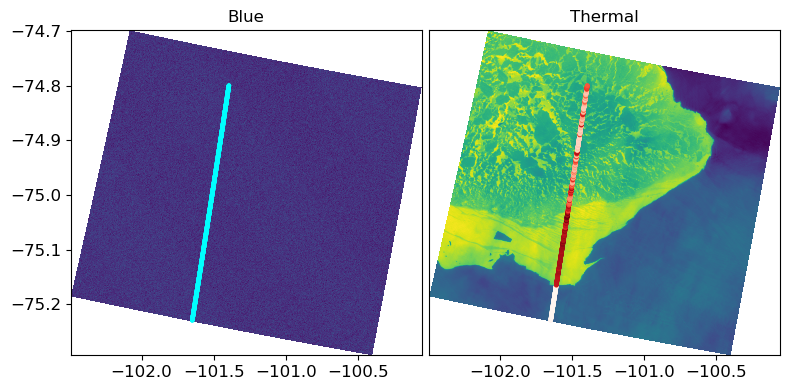

In [48]:
fig, (ax,ax1) = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(8,4))

ax.tick_params(labelsize=12)
ax.pcolormesh(pol_lon,pol_lat,bimage)
ax.plot(dataset['lon_ph'],dataset['lat_ph'],color='r',linewidth=1)
data = ax.scatter(lon_transect,lat_transect,c=mask_transect,s=5,cmap='cool',zorder=2)
# fig.colorbar(data, ax=ax)
ax.title.set_text('Blue')

ax1.tick_params(labelsize=12)
ax1.pcolormesh(pol_lon,pol_lat,timagen)
data = ax1.scatter(lon_transect,lat_transect,c=t_transect,s=5,cmap='Reds',zorder=2,vmin=13000,vmax=16000)
ax1.title.set_text('Thermal')
ax1.axes.get_yaxis().set_visible(False)
# fig.colorbar(data, ax=ax1)

plt.tight_layout(w_pad=0.2)

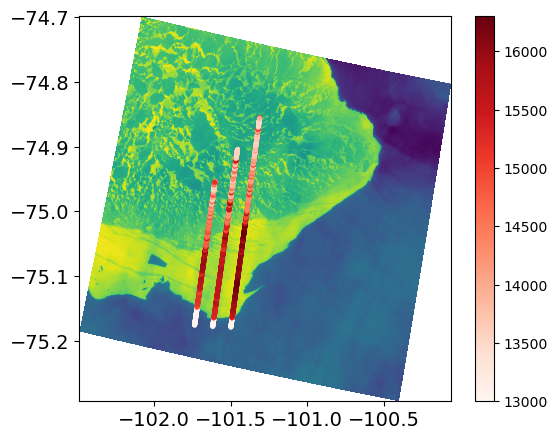

In [139]:
fig, ax = plt.subplots(figsize=(6,5))

tmax = 16300
tmin = 13000

ax.tick_params(labelsize=14)
ax.pcolormesh(pol_lon,pol_lat,timagen)
data = ax.scatter(lon_transect,lat_transect,c=t_transect,s=5,cmap='Reds',zorder=2,vmin=tmin,vmax=tmax)
ax.scatter(lon_transect2,lat_transect2,c=t_transect2,s=5,cmap='Reds',zorder=2,vmin=tmin,vmax=tmax)
ax.scatter(lon_transect3,lat_transect3,c=t_transect3,s=5,cmap='Reds',zorder=2,vmin=tmin,vmax=tmax)
ax.scatter(lon_transect4,lat_transect4,c=t_transect4,s=5,cmap='Reds',zorder=2,vmin=tmin,vmax=tmax)
ax.scatter(lon_transect5,lat_transect5,c=t_transect5,s=5,cmap='Reds',zorder=2,vmin=tmin,vmax=tmax)
ax.scatter(lon_transect6,lat_transect6,c=t_transect6,s=5,cmap='Reds',zorder=2,vmin=tmin,vmax=tmax)
# ax.title.set_text('Thermal')
fig.colorbar(data, ax=ax)


#### Plot IS2 heights over Landsat thermal

In [48]:
ssh

<xarray.Dataset>
Dimensions:      (x: 121)
Coordinates:
    lon          (x) float64 -101.5 -101.5 -101.5 ... -101.7 -101.7 -101.7
    lat          (x) float64 -74.82 -74.82 -74.82 ... -75.17 -75.17 -75.17
Dimensions without coordinates: x
Data variables:
    h_estimate   (x) float64 -27.94 -28.1 -28.08 -27.98 ... 53.75 53.5 51.81
    h_err        (x) float64 0.04253 0.01673 0.02001 ... 0.02753 0.09575 0.02232
    ph_dens      (x) float64 21.99 229.4 15.45 12.73 ... 12.7 14.68 17.37 309.0
    ocean_class  (x) bool True False True True False ... True True True False
Attributes:
    description:  height estimated from histogram

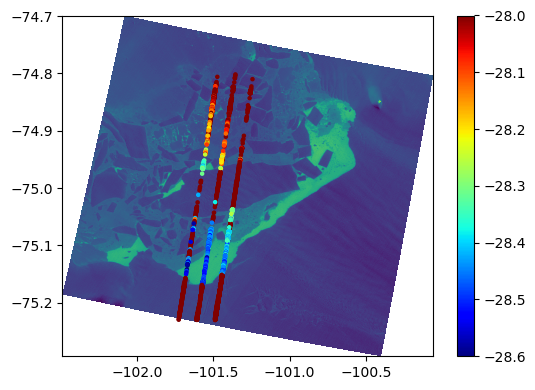

In [49]:
fig, ax = plt.subplots(ncols=1,sharey=True,sharex=True,figsize=(5.5,4))
#ax.pcolormesh(pol_lon,pol_lat,bimage)
ax.pcolormesh(pol_lon,pol_lat,timagen)

for track in ['gt1l','gt2l','gt3l','gt1r','gt2r','gt3r']:
    ssh = ssh_dset_dict[track]
       
    im = ax.scatter(ssh['lon'],ssh['lat'],c=ssh['h_estimate'],s=5,cmap='jet',vmin=-28.6,vmax=-28)

fig.colorbar(im, ax=ax)
plt.tight_layout(w_pad=0.2)

### Comparison of thermal transect vs ssh estimate

In [50]:
ssh['h_estimate']

<xarray.DataArray 'h_estimate' (x: 121)>
array([-27.94      , -28.1       , -28.08      , -27.98      ,
       -27.94      , -27.96      , -27.7       , -27.99      ,
       -27.98      , -27.96      , -27.84      , -28.1       ,
       -27.62      , -27.98      , -27.75      , -28.02      ,
       -28.01      , -28.08      , -28.08      , -28.02      ,
       -27.99      , -28.        , -27.98      , -28.02      ,
       -28.02      , -28.02666667, -28.02      , -28.04      ,
       -28.        , -28.02      , -28.02      , -28.03      ,
       -28.04      , -28.08      , -28.12      , -28.04      ,
       -28.02      , -28.06      , -28.14      , -28.16      ,
       -28.1       , -28.12      , -28.14      , -28.02      ,
       -28.        , -28.12      , -28.1       , -28.04      ,
       -28.07      , -28.1       , -28.2       , -28.11      ,
       -28.02      , -28.1       , -28.12      , -28.08      ,
       -28.08      , -28.04      , -28.04      , -28.08      ,
       -28.08      , -28.16      , -28.04      , -28.08666667,
       -28.1       , -28.02      , -28.18      , -28.03      ,
       -28.16      , -28.08      , -28.02      , -28.1       ,
       -28.12      , -28.06      , -28.1       , -28.12      ,
       -28.14      , -28.18      , -28.11      , -28.1       ,
       -28.1       , -28.18      , -28.1       , -28.14      ,
       -28.18      , -28.15      , -28.13      , -28.12      ,
       -27.92      , -27.82      , -28.24      , -28.12      ,
       -28.18      , -28.13      , -28.18      , -28.2       ,
       -28.16      , -28.18      , -28.36      , -28.4       ,
       -28.32      , -28.45      , -28.4       , -28.36      ,
       -28.3       , -28.36      , -28.37      , -28.4       ,
       -28.36      , -28.26      , -28.32      , -28.42      ,
       -28.58      , -28.51      , -28.54      , -28.55333333,
       -28.58      ,  52.88      ,  53.75      ,  53.5       ,
        51.81      ])
Coordinates:
    lon      (x) float64 -101.5 -101.5 -101.5 -101.5 ... -101.7 -101.7 -101.7
    lat      (x) float64 -74.82 -74.82 -74.82 -74.83 ... -75.17 -75.17 -75.17
Dimensions without coordinates: x

In [167]:
data['latitude']

<xarray.DataArray 'latitude' (delta_time: 3456)>
array([-74.85518879, -74.8552774 , -74.85536517, ..., -75.17890646,
       -75.17899508, -75.17908283])
Coordinates:
  * delta_time  (delta_time) datetime64[ns] 2019-04-16T01:04:37.300114840 ......
    latitude    (delta_time) float64 -74.86 -74.86 -74.86 ... -75.18 -75.18
    longitude   (delta_time) float64 -101.3 -101.3 -101.3 ... -101.5 -101.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0

In [151]:
hxlim = [[-75.17,-75.0],
        [-75.17,-74.98],
       ]
        
hylim = [[-28.6,-28.33],
        [-28.57,-28.1], #28.3[-28.5,-28.28] old values
       ]

thermylim = [[17100,17450],
             [14000, 16590], 
            ]
# plt.xlim(-75.17,-75.09);
# plt.xlim(-75.15,-75);
# plt.xlim(-75.5,-74.7);
# plt.ylim(-28.6,-28.33);
# plt.ylim(-28.5,-28.28);

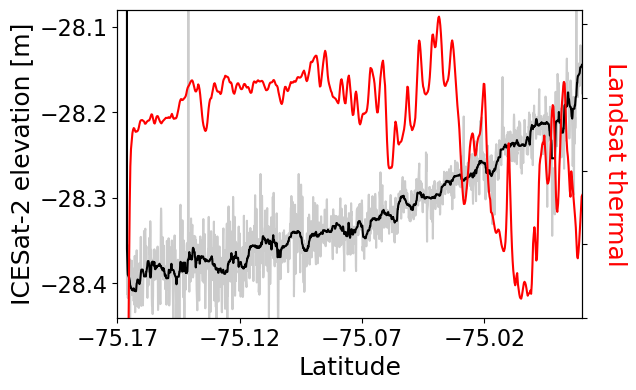

In [100]:
data = ds.where((ds.spot==1.0), drop=True)

fig, ax = plt.subplots(ncols=1,sharey=True,sharex=True,figsize=(6,4))
# ax.pcolormesh(pol_lon,pol_lat,bimage)

# for track in ['gt2l']: # our processing step
#     ssh = ssh_dset_dict[track]
#     ocean = ssh['h_estimate'].where(ssh['ocean_class']==1,np.nan)
    
#     ax.tick_params(labelsize=12)
#     ax.scatter(ssh['lat'],ssh['h_estimate'],s=10,color='0.8')
#     #ax.plot(ssh['lat'],ocean,color='k',label='ssh')
#     # running mean?
#     ssh_run = ssh['h_estimate'].rolling(x=30, center=True).mean()
#     ax.plot(ssh['lat'],ssh_run,color='k',label='SSH')
ax.tick_params(labelsize=16)
ax.plot(data['latitude'],data['h_mean'],color='0.8') #SR
sshSR_run = data['h_mean'].rolling(delta_time=30,center=True).median() #SR
ax.plot(data['latitude'],sshSR_run,color='k',label='SSH') #SR
ax.set_xlim(hxlim[z]);
ax.set_xticks(np.arange(hxlim[z][0],hxlim[z][1],0.05))
ax.set_xlabel('Latitude',fontsize=18)
ax.set_ylim(hylim[z]);
ax.set_ylabel('ICESat-2 elevation [m]',fontsize=18)
# ax.legend(fontsize=14)  

ax1 = ax.twinx()
ax1.tick_params(labelsize=18)
ax1.plot(lat_transect,t_transect,color='r',label='Thermal')
ax1.set_ylabel('Landsat thermal',labelpad=25,rotation=270,fontsize=18,color='r')
plt.ylim(thermylim[z]);
# ax1.legend(fontsize=14)
ax1.set_yticklabels([])

plt.show()

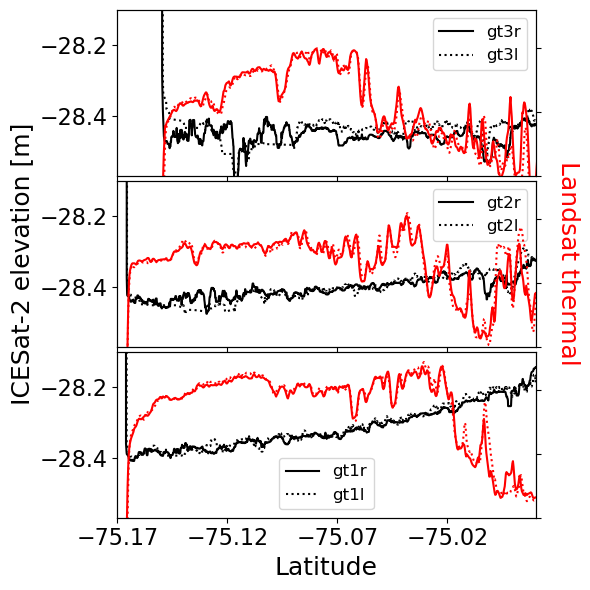

In [152]:
data1 = ds.where((ds.spot==1.0), drop=True)
data2 = ds.where((ds.spot==2.0), drop=True)
data3 = ds.where((ds.spot==3.0), drop=True)
data4 = ds.where((ds.spot==4.0), drop=True)
data5 = ds.where((ds.spot==5.0), drop=True)
data6 = ds.where((ds.spot==6.0), drop=True)

fig, axs = plt.subplots(ncols=1,nrows=3,sharey=True,sharex=True,figsize=(6,6))

ax = axs[2]
ax.tick_params(labelsize=16)
sshSR_run = data1['h_mean'].rolling(delta_time=30,center=True).median() #SR
ax.plot(data1['latitude'],sshSR_run,color='k',label='gt1r') #SR
sshSR_run = data2['h_mean'].rolling(delta_time=30,center=True).median() #SR
ax.plot(data2['latitude'],sshSR_run,linestyle=':',color='k',label='gt1l') #SR
ax.set_xlim(hxlim[z]);
ax.set_xticks(np.arange(hxlim[z][0],hxlim[z][1],0.05))
ax.set_ylim(hylim[z]);
ax.set_xlabel('Latitude',fontsize=18)
ax.legend(loc='lower center',fontsize=12)  

ax1 = ax.twinx()
ax1.tick_params(labelsize=16)
ax1.plot(lat_transect,t_transect,color='r',label='Thermal')
ax1.plot(lat_transect2,t_transect2,color='r',linestyle=':')
plt.ylim(thermylim[z]);
# ax1.legend(fontsize=14)
ax1.set_yticklabels([])

ax2 = axs[1]
ax2.tick_params(labelsize=16)
sshSR_run = data3['h_mean'].rolling(delta_time=30,center=True).median() #SR
ax2.plot(data3['latitude'],sshSR_run,color='k',label='gt2r') #SR
sshSR_run = data4['h_mean'].rolling(delta_time=30,center=True).median() #SR
ax2.plot(data4['latitude'],sshSR_run,linestyle=':',color='k',label='gt2l') #SR
ax2.set_xlim(hxlim[z]);
ax2.set_xticks(np.arange(hxlim[z][0],hxlim[z][1],0.05))
ax2.set_ylim(hylim[z]);
ax2.set_ylabel('ICESat-2 elevation [m]',fontsize=18)
ax2.legend(fontsize=12)  

ax3 = ax2.twinx()
ax3.tick_params(labelsize=18)
ax3.plot(lat_transect3,t_transect3,color='r',label='Thermal')
ax3.plot(lat_transect4,t_transect4,color='r',linestyle=':')
ax3.set_ylabel('Landsat thermal',labelpad=25,rotation=270,fontsize=18,color='r')
plt.ylim(thermylim[z]);
# ax3.legend(fontsize=14)
ax3.set_yticklabels([])

ax4 = axs[0]
ax4.tick_params(labelsize=16)
sshSR_run = data5['h_mean'].rolling(delta_time=30,center=True).median() #SR
ax4.plot(data5['latitude'],sshSR_run,color='k',label='gt3r') #SR
sshSR_run = data6['h_mean'].rolling(delta_time=30,center=True).median() #SR
ax4.plot(data6['latitude'],sshSR_run,linestyle=':',color='k',label='gt3l') #SR
ax4.set_xlim(hxlim[z]);
ax4.set_xticks(np.arange(hxlim[z][0],hxlim[z][1],0.05))
ax4.set_ylim(hylim[z]);
ax4.legend(fontsize=12)  

ax5 = ax4.twinx()
ax5.tick_params(labelsize=16)
ax5.plot(lat_transect5,t_transect5,color='r')
ax5.plot(lat_transect6,t_transect6,color='r',linestyle=':')
plt.ylim(thermylim[z]);
# ax1.legend(fontsize=14)
ax5.set_yticklabels([])

plt.tight_layout(h_pad=0.02)
# plt.savefig('/Users/tsnow03/GoogleDrive/User/Docs/PhD_Project/MODIS_Manuscript/Figures/DWMSSTvMoorP.jpg', format='jpg', dpi=400)
plt.show()